# **Final Python Notebook 2:Classification Modeling & Hyperparameter Tunning**

Author: Nelith Nethsanda

Uow ID:w2051741

IIT ID:20230664

Peer Reviewer: Sonal Pathinayaka

Date Reviewed: 15th March 2025  

Notebook Purpose: Build and evaluate classification models for breast cancer mortality using Logistic Regression, Naïve Bayes, and KNN, including hyperparameter tuning.

In [44]:
import pandas as pd

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [46]:
data = pd.read_csv("/content/classification_dataset.csv")

In [47]:
# Drop any rows with missing target values (safe step to avoid stratify errors)
data = data.dropna(subset=['Mortality_Status'])

In [48]:
data = data.select_dtypes(include=[np.number])

In [49]:
print(data.shape)
print(data['Mortality_Status'].value_counts(dropna=False))


(4001, 13)
Mortality_Status
0    3386
1     615
Name: count, dtype: int64


In [50]:
X = data.drop("Mortality_Status", axis=1)
y = data["Mortality_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [51]:
# Check feature shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3200, 12)
Test shape: (801, 12)


In [52]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Mortality_Status
0    0.84625
1    0.15375
Name: proportion, dtype: float64
Mortality_Status
0    0.846442
1    0.153558
Name: proportion, dtype: float64


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X = data.drop("Mortality_Status", axis=1)
y = data["Mortality_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Add this line right here:
print("Feature Names:")
for feature in X.columns:
    print(" ", feature)
   # <-- This will show the list of features


Feature Names:
  Age
  Sex
  T_Stage
  N_Stage
  Differentiated
  Grade
  A_Stage
  Tumor_Size
  Estrogen_Status
  Progesterone_Status
  Regional_Node_Examined
  Regional_Node_Positive



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       678
           1       0.77      0.14      0.23       123

    accuracy                           0.86       801
   macro avg       0.82      0.57      0.58       801
weighted avg       0.85      0.86      0.82       801



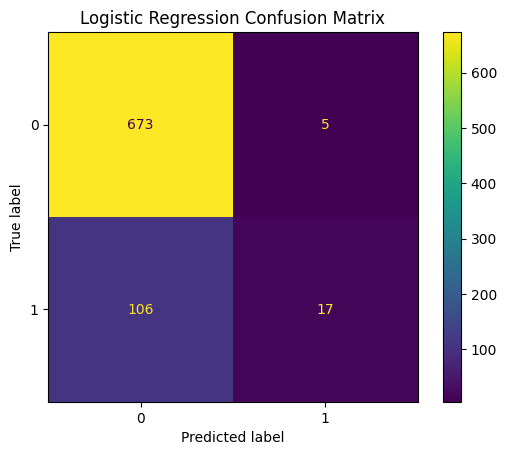

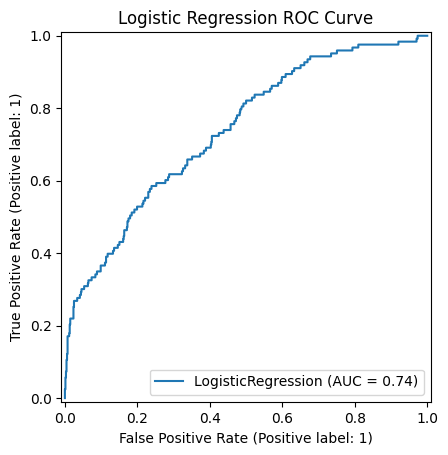

ROC AUC Score (Logistic Regression): 0.7373492097752836


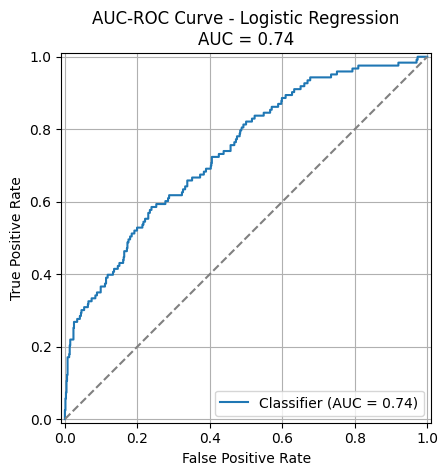

In [55]:
#Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()

try:
    y_probs_lr = lr.predict_proba(X_test_scaled)[:, 1]
    roc_auc_lr = roc_auc_score(y_test, y_probs_lr)
    print("ROC AUC Score (Logistic Regression):", roc_auc_lr)

    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, y_probs_lr, ax=ax)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"AUC-ROC Curve - Logistic Regression\nAUC = {roc_auc_lr:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

except Exception as e:
    print("ROC Curve cannot be displayed:", str(e))


KNN Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       678
           1       0.41      0.14      0.21       123

    accuracy                           0.84       801
   macro avg       0.64      0.55      0.56       801
weighted avg       0.79      0.84      0.80       801



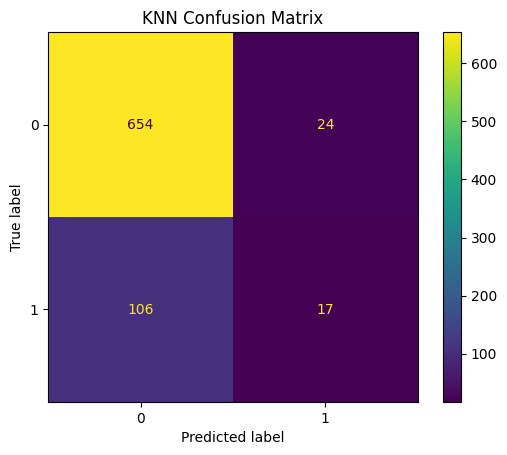

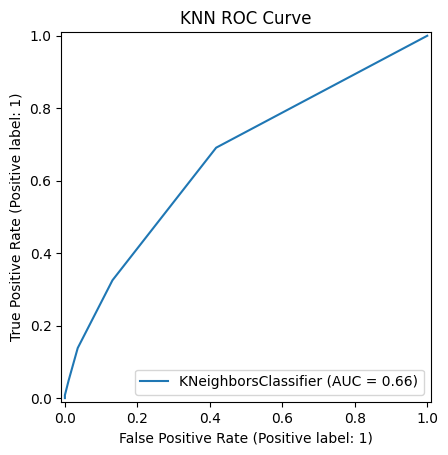

ROC AUC Score (KNN): 0.6628474470585415


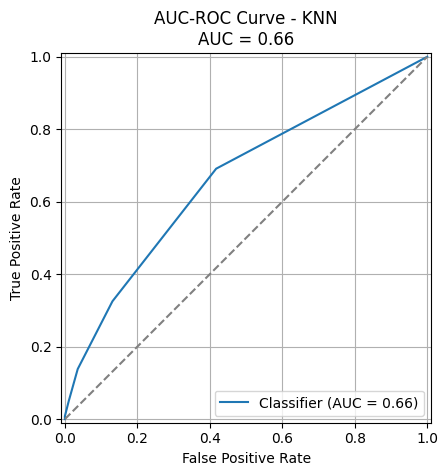

In [56]:
#K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN Report:")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.title("KNN Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title("KNN ROC Curve")
plt.show()

try:
    y_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_probs_knn)
    print("ROC AUC Score (KNN):", roc_auc_knn)

    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, y_probs_knn, ax=ax)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"AUC-ROC Curve - KNN\nAUC = {roc_auc_knn:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

except Exception as e:
    print("ROC Curve cannot be displayed (KNN):", str(e))

In [57]:
X.columns.tolist()

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive']


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       678
           1       0.39      0.37      0.38       123

    accuracy                           0.81       801
   macro avg       0.64      0.63      0.64       801
weighted avg       0.81      0.81      0.81       801



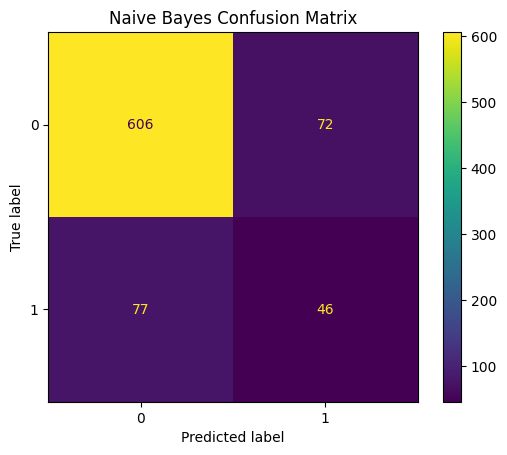

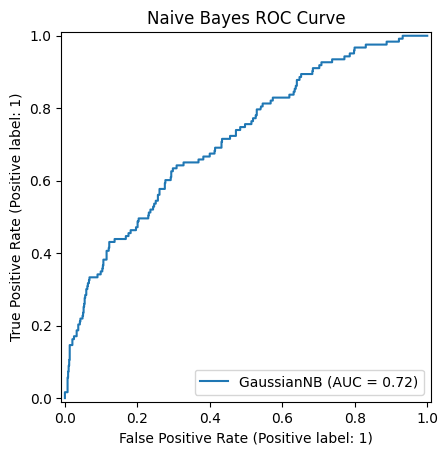

ROC AUC Score (Naive Bayes): 0.7154651413770774


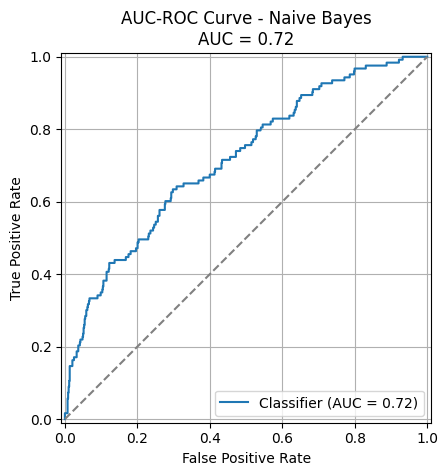

In [58]:
# Block: Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\nNaive Bayes Report:")
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(nb, X_test_scaled, y_test)
plt.title("Naive Bayes ROC Curve")
plt.show()

try:
    y_probs_nb = nb.predict_proba(X_test_scaled)[:, 1]
    roc_auc_nb = roc_auc_score(y_test, y_probs_nb)
    print("ROC AUC Score (Naive Bayes):", roc_auc_nb)

    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, y_probs_nb, ax=ax)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"AUC-ROC Curve - Naive Bayes\nAUC = {roc_auc_nb:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

except Exception as e:
    print("ROC Curve cannot be displayed (NB):", str(e))

In [59]:
print("Best var_smoothing value:", grid_nb.best_params_)


Best var_smoothing value: {'var_smoothing': np.float64(1.0)}


In [60]:
print("Default var_smoothing:", GaussianNB().var_smoothing)


Default var_smoothing: 1e-09



Logistic Regression Params: {'C': 1}

Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       678
           1       0.77      0.14      0.23       123

    accuracy                           0.86       801
   macro avg       0.82      0.57      0.58       801
weighted avg       0.85      0.86      0.82       801



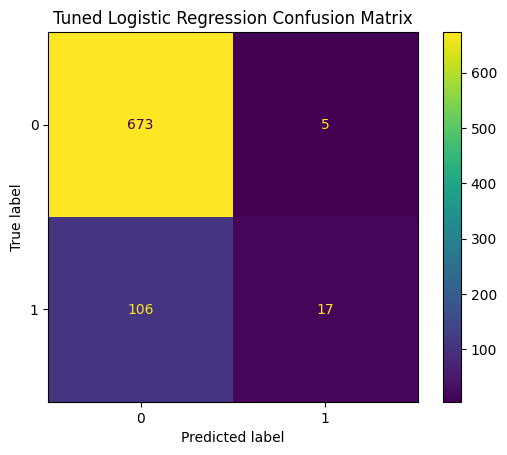

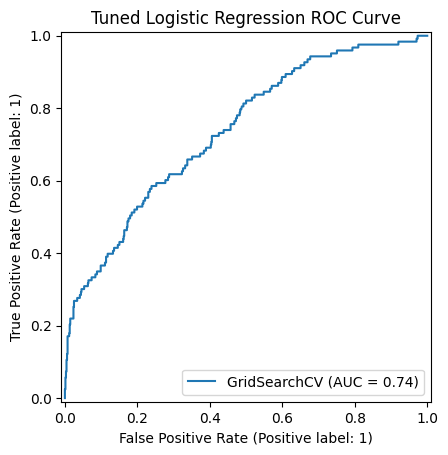

In [61]:
# Block: Hyperparameter Tuning for Best Model (Logistic Regression Example)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_weighted')
grid_lr.fit(X_train_scaled, y_train)
print("\nLogistic Regression Params:", grid_lr.best_params_)
y_pred_lr_tuned = grid_lr.predict(X_test_scaled)
print("\nTuned Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr_tuned))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr_tuned)).plot()
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(grid_lr, X_test_scaled, y_test)
plt.title("Tuned Logistic Regression ROC Curve")
plt.show()


Best Naive Bayes Params: {'var_smoothing': np.float64(1.0)}

Tuned Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       678
           1       0.52      0.18      0.27       123

    accuracy                           0.85       801
   macro avg       0.70      0.57      0.59       801
weighted avg       0.81      0.85      0.82       801



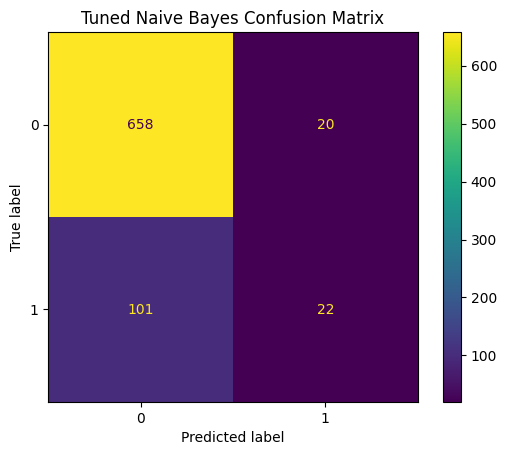

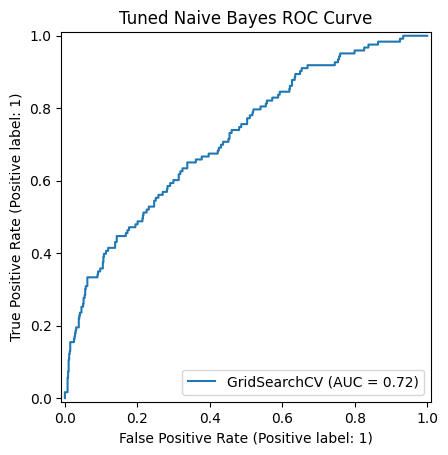

In [62]:
# Hyperparameter Tuning for Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

# Define the parameter grid
nb_param_grid = {'var_smoothing': np.logspace(0, -9, 100)}

# Set up GridSearchCV for Naive Bayes
grid_nb = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='f1_weighted')
grid_nb.fit(X_train_scaled, y_train)

# Best parameters
print("\nBest Naive Bayes Params:", grid_nb.best_params_)

# Predict using best model
y_pred_nb_tuned = grid_nb.predict(X_test_scaled)

# Evaluation
print("\nTuned Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb_tuned))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb_tuned)).plot()
plt.title("Tuned Naive Bayes Confusion Matrix")
plt.show()
RocCurveDisplay.from_estimator(grid_nb, X_test_scaled, y_test)
plt.title("Tuned Naive Bayes ROC Curve")
plt.show()
